In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


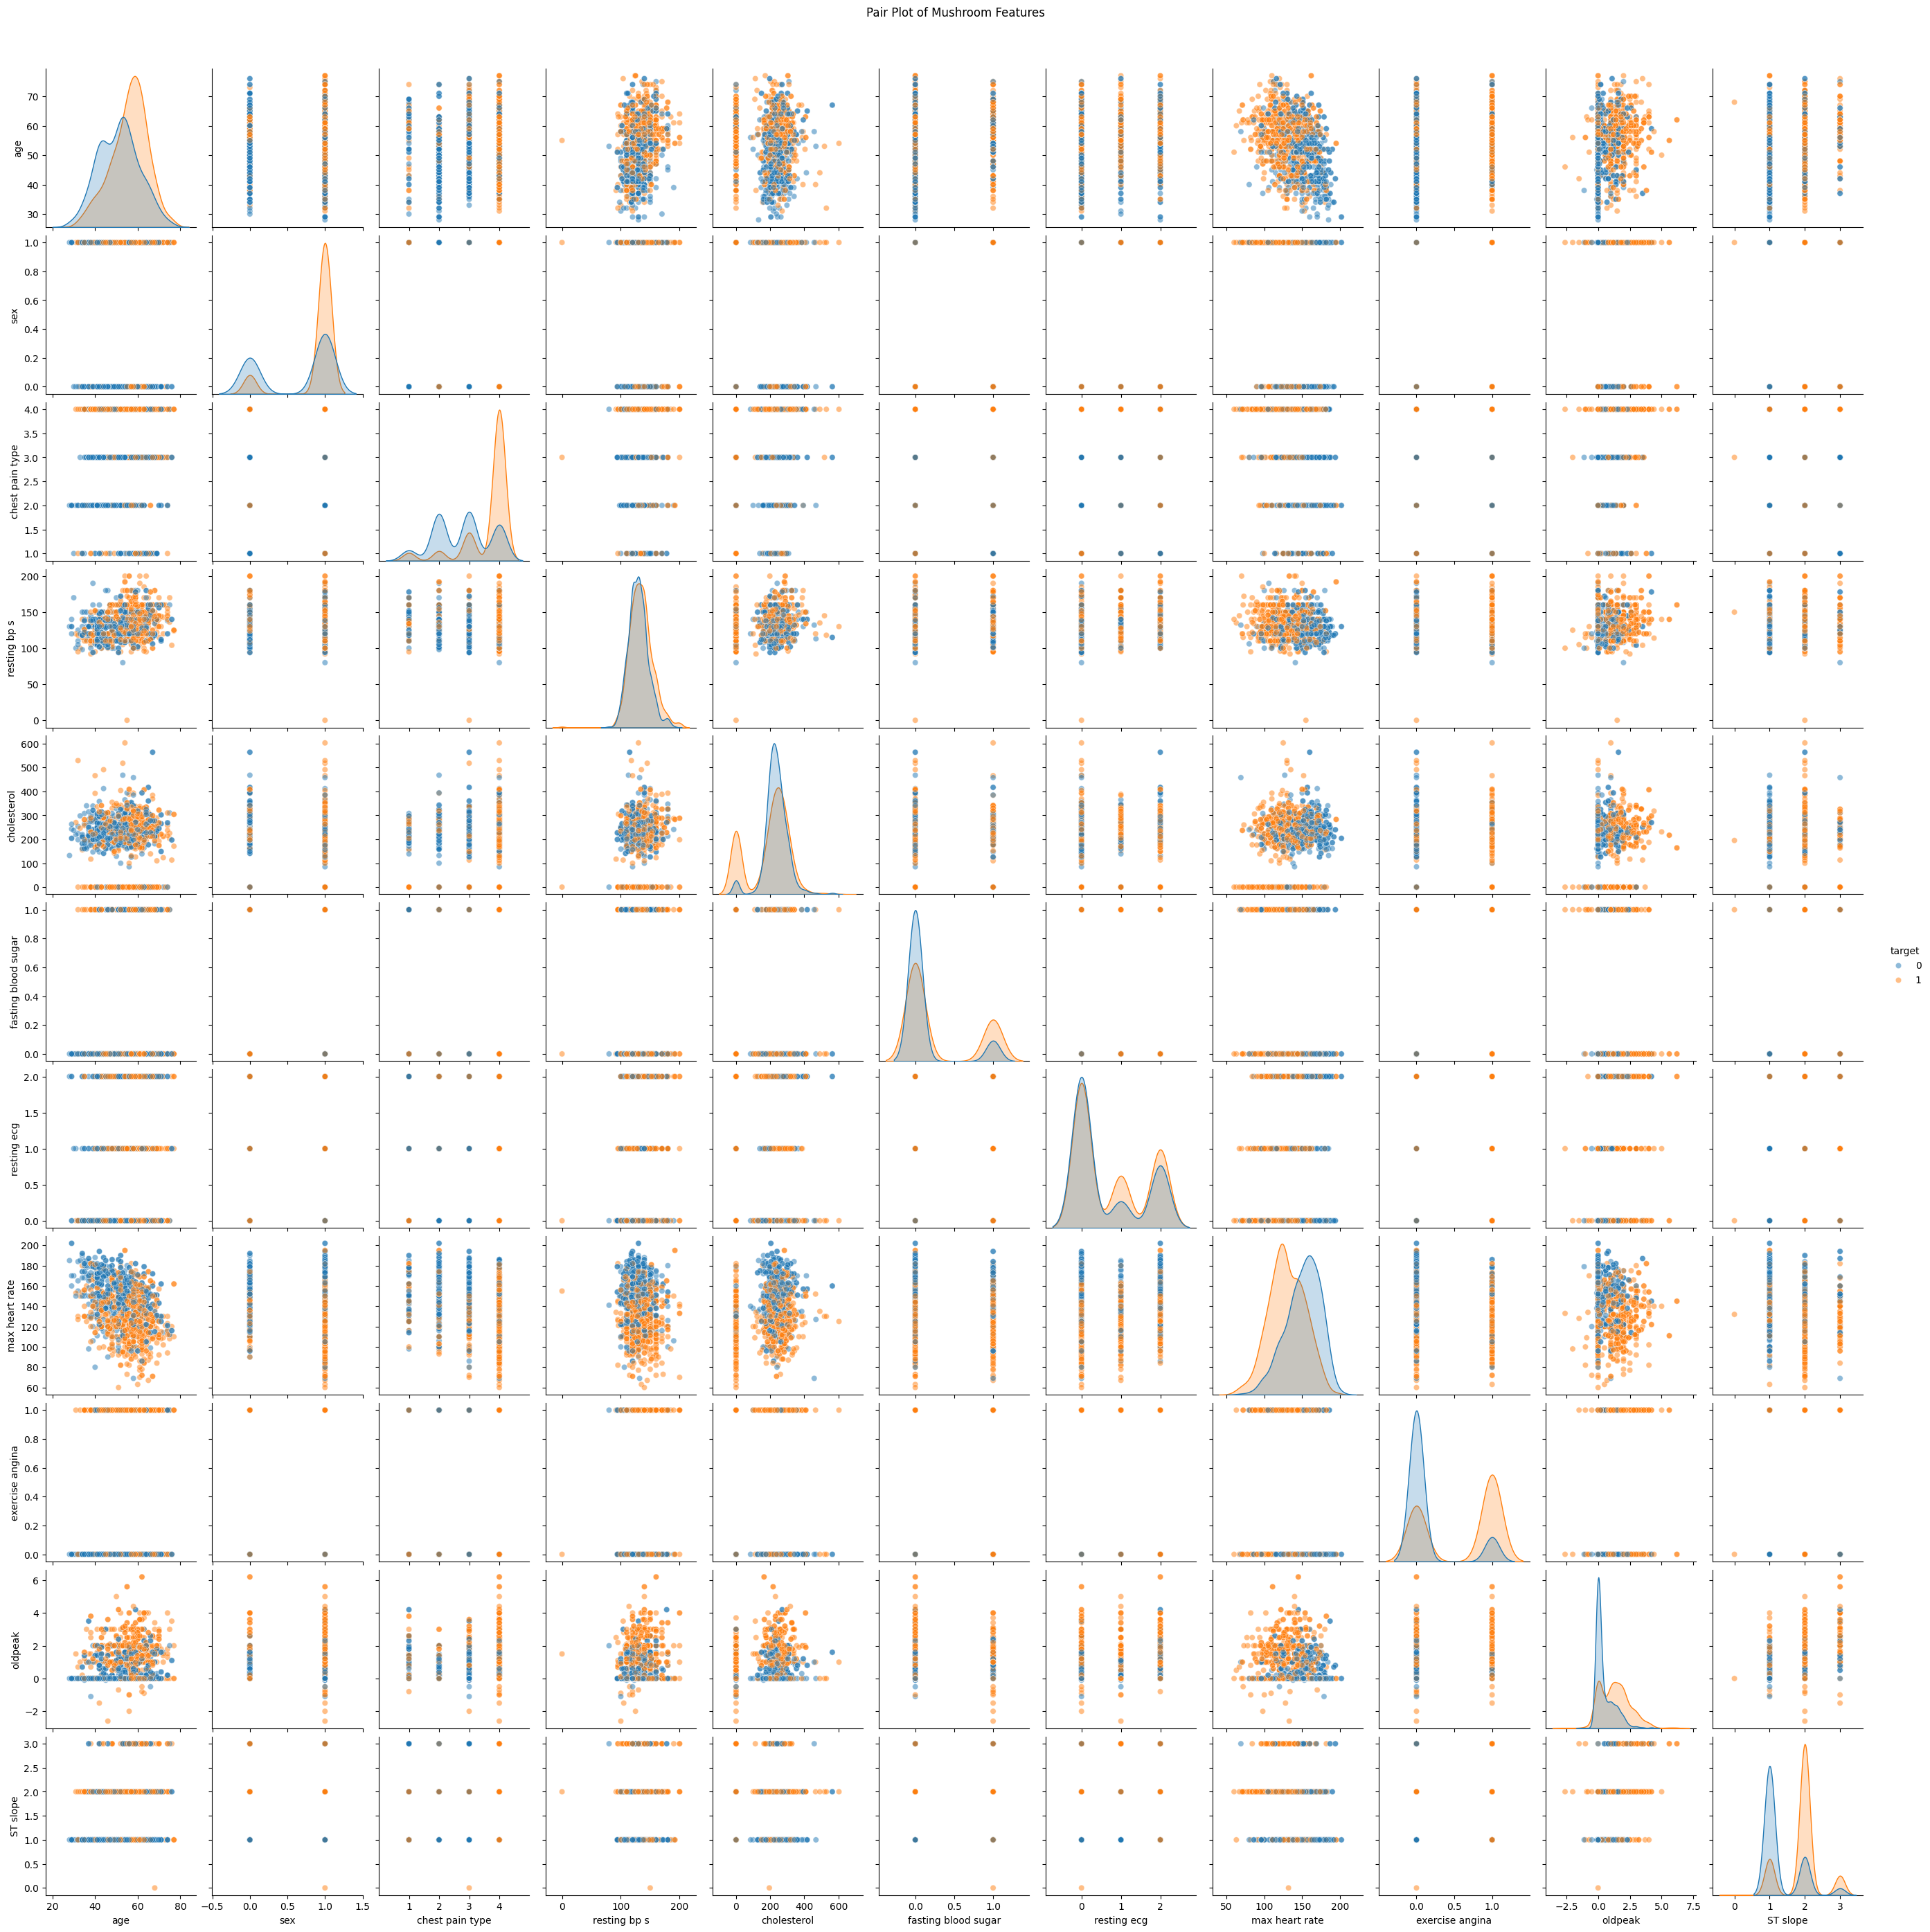

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

# Select the desired features
subset_features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target']

# Create a pair plot
sns.pairplot(df[subset_features], hue='target', plot_kws={'alpha':0.5})

# Display the plot
plt.suptitle('Pair Plot of Mushroom Features', y=1.02)
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#plt.style.use('ggplot')
heartd = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
print("~~~~ cholesterol ~~~~~")
print(heartd.columns.names)
print("~~~~ Target ~~~~~")
print (heartd.columns[-1])

~~~~ cholesterol ~~~~~
[None]
~~~~ Target ~~~~~
target


In [ ]:
heartd.shape

(1190, 12)

In [ ]:
# Convert the DataFrame to a NumPy array
heartd_array = heartd.to_numpy()

# Reshape the array to (-1, 1)
reshaped_heartd = heartd_array.reshape(-1, 1)

# Print the reshaped array
print(reshaped_heartd)

[[40.]
 [ 1.]
 [ 2.]
 ...
 [ 0.]
 [ 1.]
 [ 0.]]


In [ ]:
print(heartd.target.value_counts())

target
1    629
0    561
Name: count, dtype: int64


In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
                                    heartd.cholesterol, heartd.target,
                                  test_size=0.3,random_state=109)

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


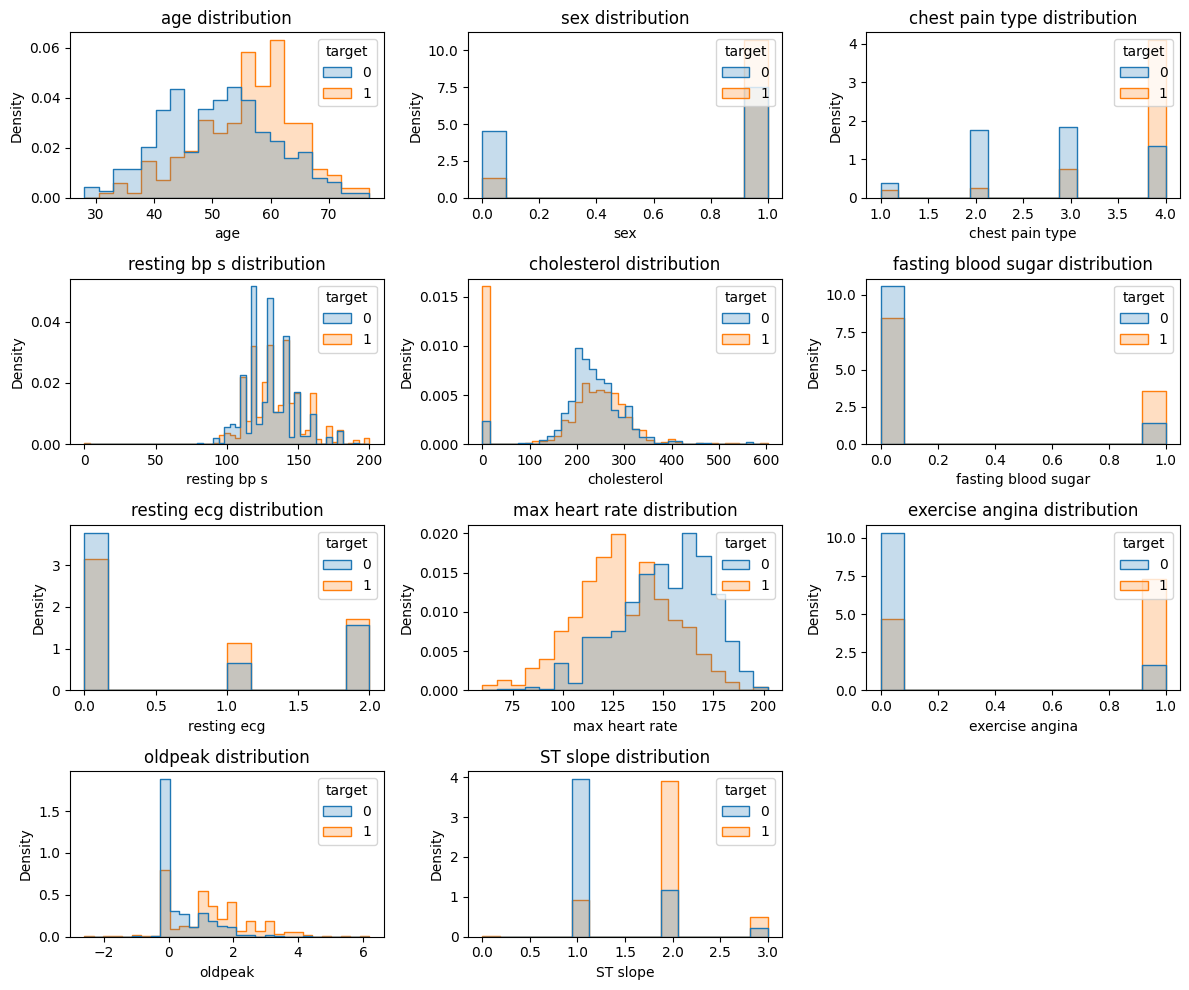

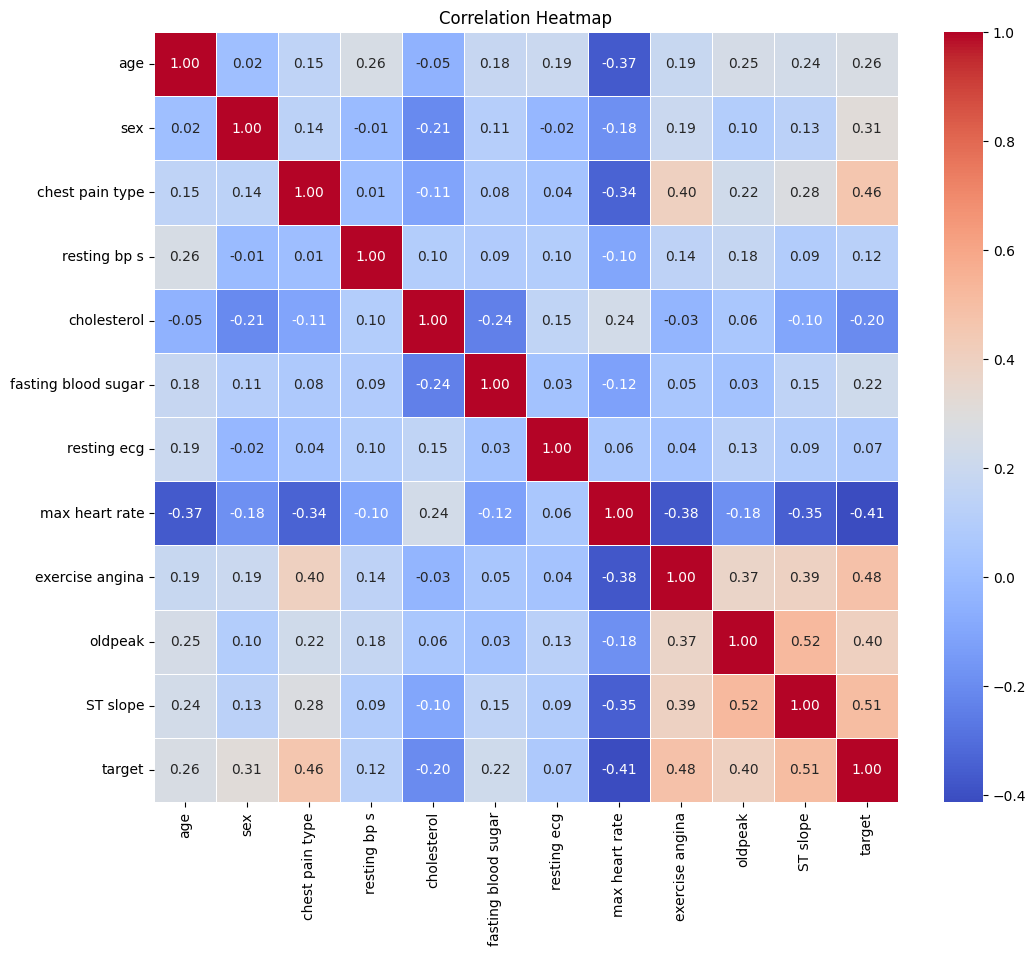

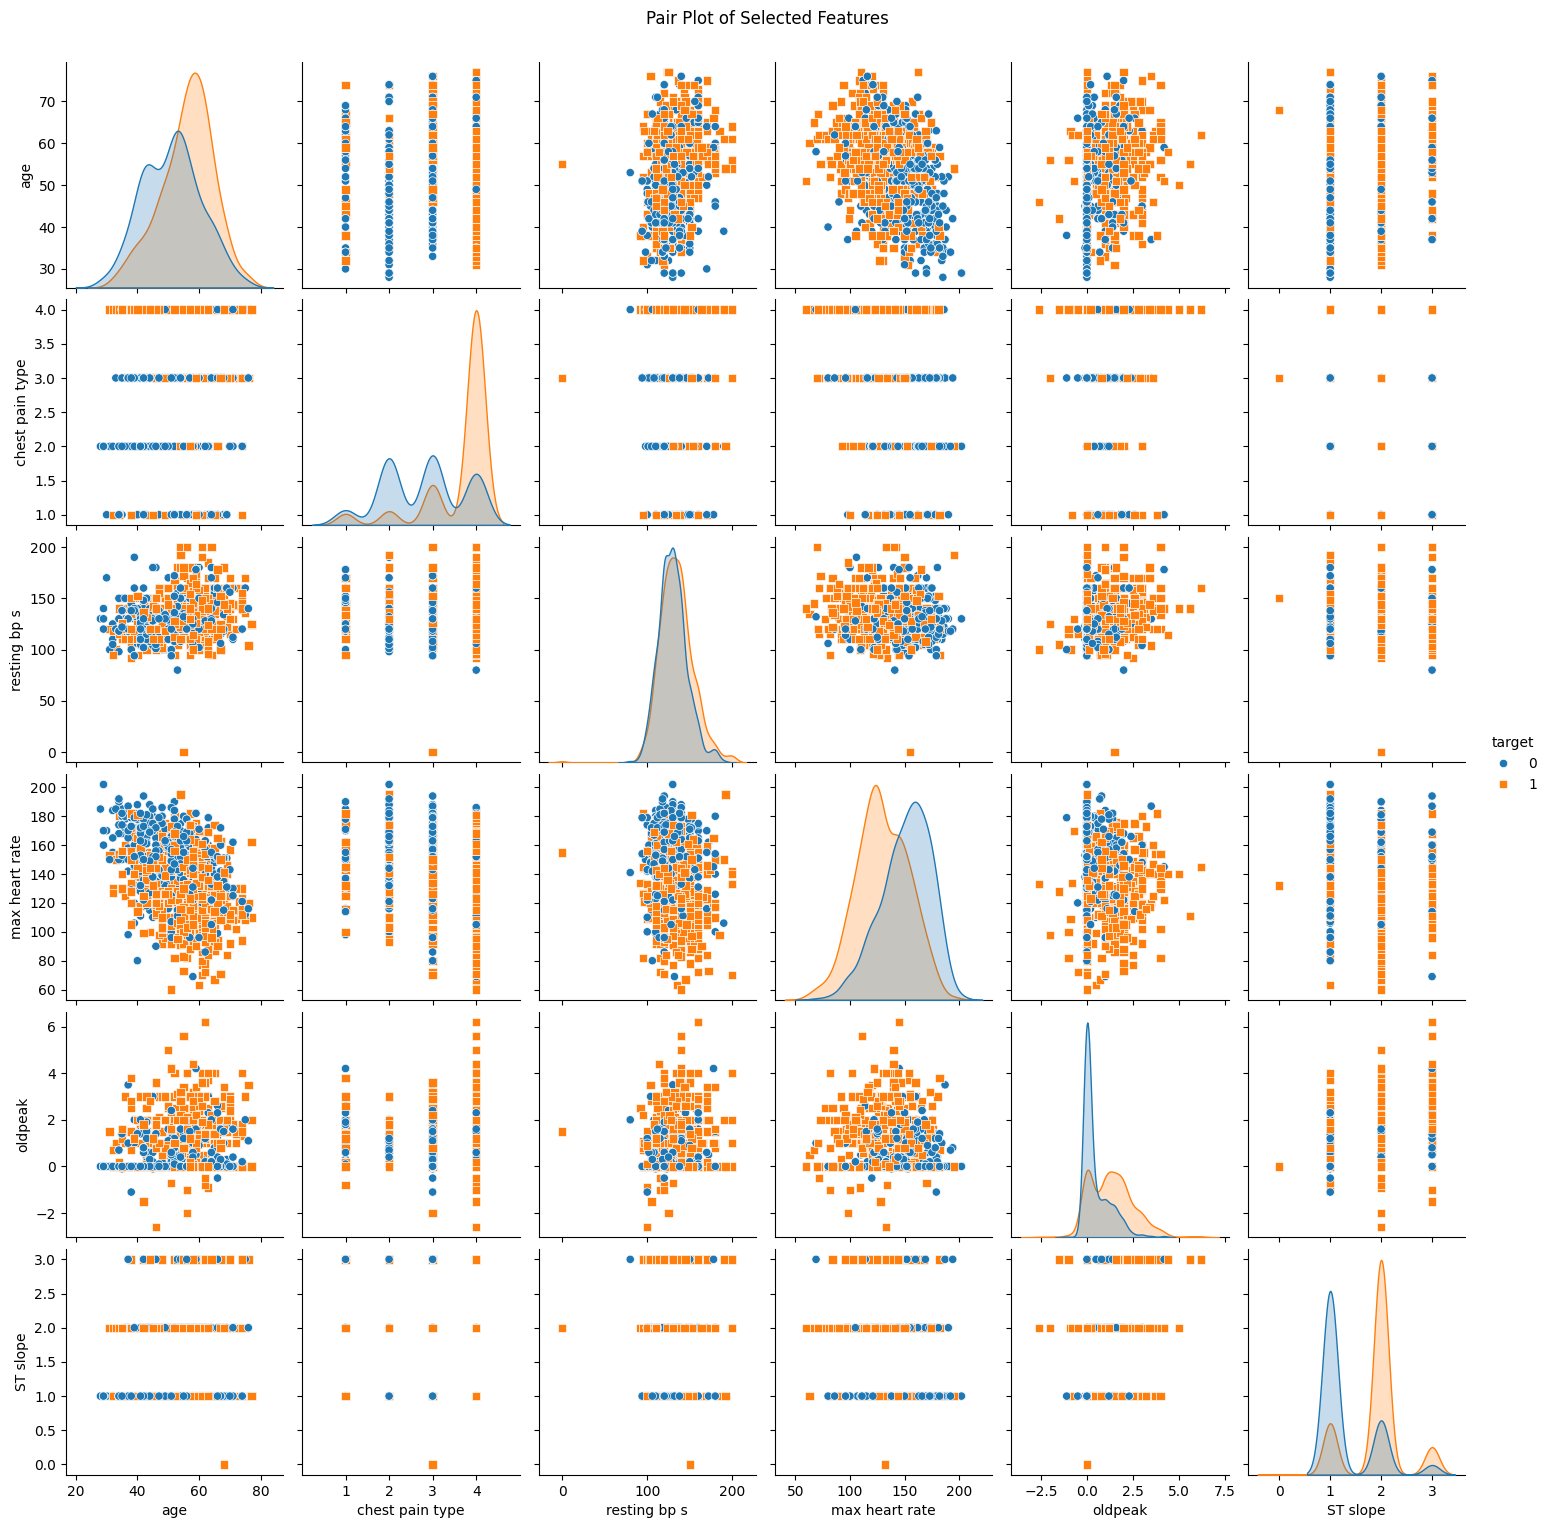

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/heart_statlog_cleveland_hungary_final.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Set up the matplotlib figure for histograms
plt.figure(figsize=(12, 10))

# List of features to plot
features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
            'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina',
            'oldpeak', 'ST slope']

# Plot histograms of each feature grouped by the target variable
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=data, x=feature, hue='target', element='step', stat='density', common_norm=False)
    plt.title(f'{feature} distribution')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Select a subset of features for pair plots
subset_features = ['age', 'chest pain type', 'resting bp s', 'max heart rate', 'oldpeak', 'ST slope', 'target']

# Generate pair plots
sns.pairplot(data[subset_features], hue='target', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = '/content/heart_statlog_cleveland_hungary_final.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Define features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Confusion Matrix:
[[ 88  19]
 [  7 124]]

Classification 

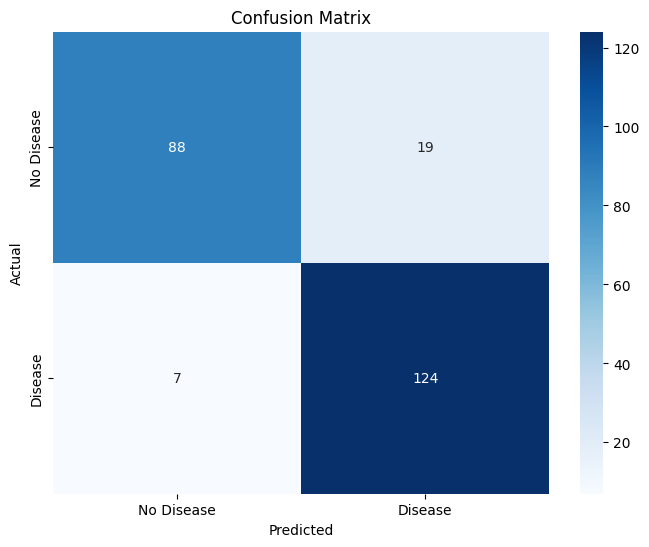

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


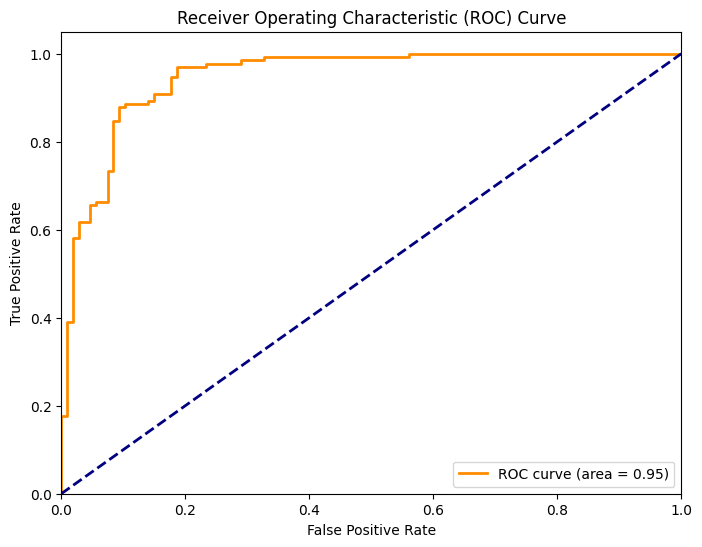

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the test set
y_proba = svm_model.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


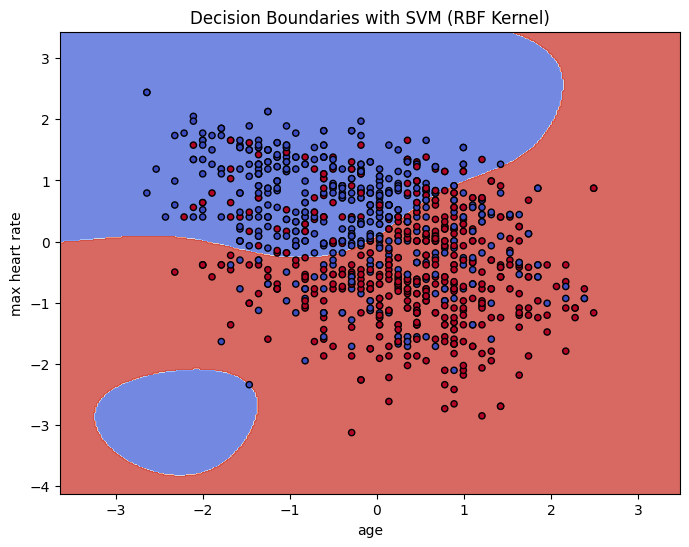

In [ ]:
import numpy as np

# Select two features for visualization
features_subset = ['age', 'max heart rate']
X_subset = data[features_subset]
y_subset = data['target']

# Standardize the features
scaler_subset = StandardScaler()
X_subset_scaled = scaler_subset.fit_transform(X_subset)

# Split the subset data
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset_scaled, y_subset, test_size=0.2, random_state=42)

# Train the SVM model on the subset
svm_model_subset = SVC(kernel='rbf', random_state=42)
svm_model_subset.fit(X_train_subset, y_train_subset)

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for the mesh
Z = svm_model_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
plt.xlabel(features_subset[0])
plt.ylabel(features_subset[1])
plt.title('Decision Boundaries with SVM (RBF Kernel)')
plt.show()
